IQFeed 5 Sec data

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from pytz import timezone
import time
from time import gmtime, strftime
import time
import os
from random import randint
import pandas as pd
import numpy as np
from pytz import timezone
from datetime import datetime

In [3]:
#%run iqfeed_download.py

error: [Errno 111] Connection refused

In [7]:
path = '/home/octo/Desktop/PROJECT/DATA/MIN/'

In [66]:
SPY=pd.read_csv(path + 'SPY.csv',names = ["high", "low", "open","close","total_volume","volume"],index_col=0, parse_dates=True)

In [9]:
DWTI=pd.read_csv(path + 'DWTI.csv',names = ["high", "low", "open","close","total_volume","volume"],index_col=0, parse_dates=True)

In [10]:
USDCAD=pd.read_csv(path + 'USDCAD.csv',names = ["high", "low", "open","close","total_volume","volume"],index_col=0, parse_dates=True)

In [11]:
GLD=pd.read_csv(path + 'GLD.csv',names = ["high", "low", "open","close","total_volume","volume"],index_col=0, parse_dates=True)

In [12]:
TLT=pd.read_csv(path + 'TLT.csv',names = ["high", "low", "open","close","total_volume","volume"],index_col=0, parse_dates=True)

In [13]:
EEM=pd.read_csv(path + 'EEM.csv',names = ["high", "low", "open","close","total_volume","volume"],index_col=0, parse_dates=True)

In [14]:
SST=pd.read_csv(path + 'SST.csv',names = ["high", "low", "open","close","total_volume","volume"],index_col=0, parse_dates=True)

In [15]:
XLV=pd.read_csv(path + 'XLV.csv',names = ["high", "low", "open","close","total_volume","volume"],index_col=0, parse_dates=True)

In [16]:
XLF=pd.read_csv(path + 'XLF.csv',names = ["high", "low", "open","close","total_volume","volume"],index_col=0, parse_dates=True)

In [17]:
XLP=pd.read_csv(path + 'XLP.csv',names = ["high", "low", "open","close","total_volume","volume"],index_col=0, parse_dates=True)

In [18]:
XLE=pd.read_csv(path + 'XLE.csv',names = ["high", "low", "open","close","total_volume","volume"],index_col=0, parse_dates=True)

In [19]:
XLK=pd.read_csv(path + 'XLK.csv',names = ["high", "low", "open","close","total_volume","volume"],index_col=0, parse_dates=True)

In [20]:
XLB=pd.read_csv(path + 'XLB.csv',names = ["high", "low", "open","close","total_volume","volume"],index_col=0, parse_dates=True)

In [ ]:
XLU=pd.read_csv(path + 'XLU.csv',names = ["high", "low", "open","close","total_volume","volume"],index_col=0, parse_dates=True)

In [21]:
XLI=pd.read_csv(path + 'XLI.csv',names = ["high", "low", "open","close","total_volume","volume"],index_col=0, parse_dates=True)

In [22]:
NQ=pd.read_csv(path + 'NQ.csv',names = ["high", "low", "open","close","total_volume","volume"],index_col=0, parse_dates=True)

In [23]:
SPX=pd.read_csv(path + 'SPX.csv',names = ["high", "low", "open","close","total_volume","volume"],index_col=0, parse_dates=True)

In [67]:
SPY.tail()

,high,low,open,close,total_volume,volume
2016-08-08 15:59:40,218.040,218.03,218.035,218.035,36390874,19621
2016-08-08 15:59:45,218.040,218.03,218.040,218.030,36459654,67581
2016-08-08 15:59:50,218.040,218.01,218.040,218.010,36509292,48278
2016-08-08 15:59:55,218.025,217.96,218.010,218.010,36592901,82746
2016-08-08 16:00:00,218.040,218.01,218.010,218.030,36712360,118139


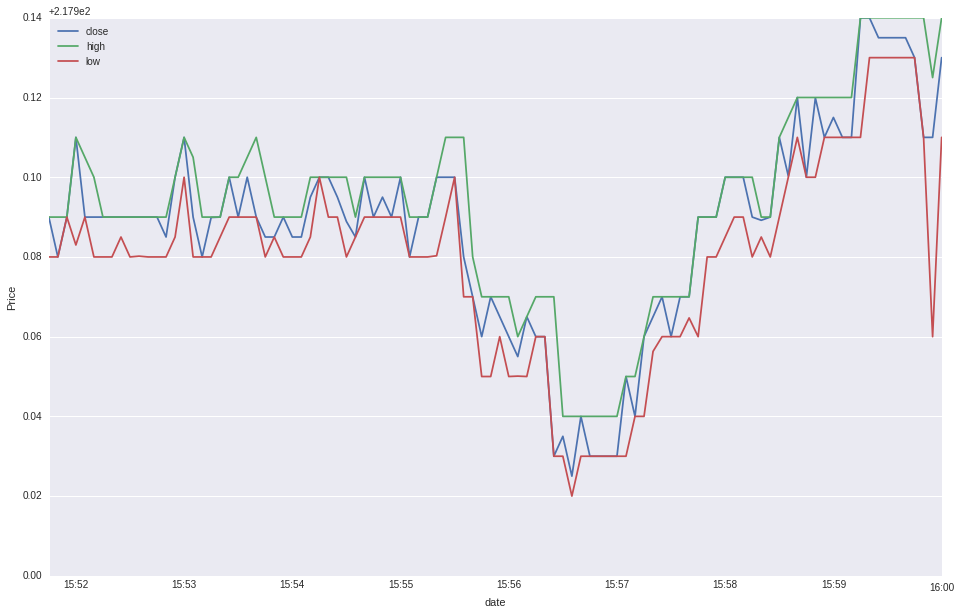

In [68]:
SPY[['close','high','low']].tail(100).plot(figsize=(16, 10))
plt.xlabel('date')
plt.ylabel('Price')

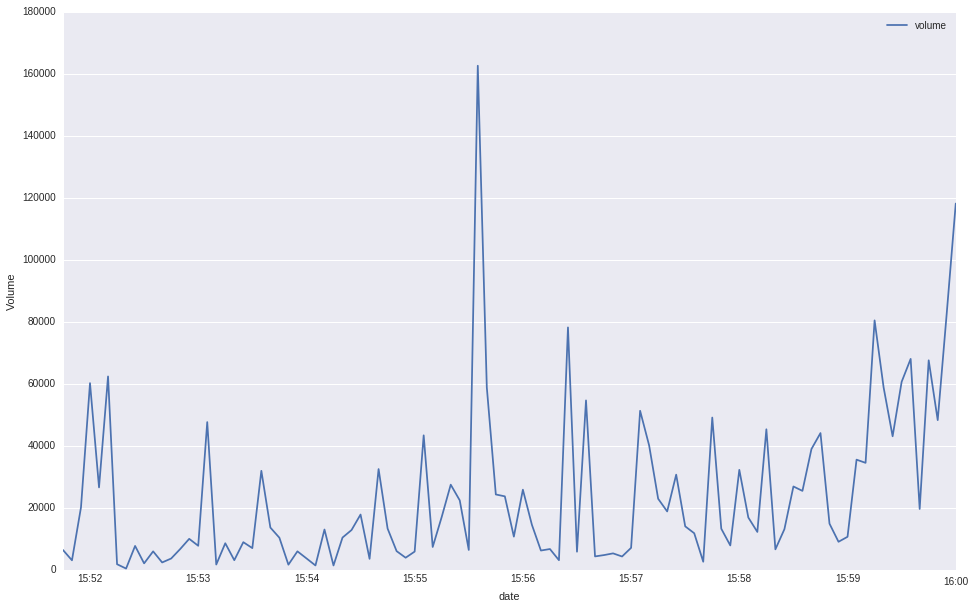

In [69]:
SPY[['volume']].tail(100).plot(figsize=(16, 10))
plt.xlabel('date')
plt.ylabel('Volume')

In [70]:
SPY['Return'] = np.log(SPY['close'] /SPY['close'].shift(1))

In [71]:
  # reads data from Google Finance
SPY['14d'] = pd.rolling_mean(SPY['close'], 14)
SPY['42d'] = pd.rolling_mean(SPY['close'], 42)
  # 42d and 252d trends

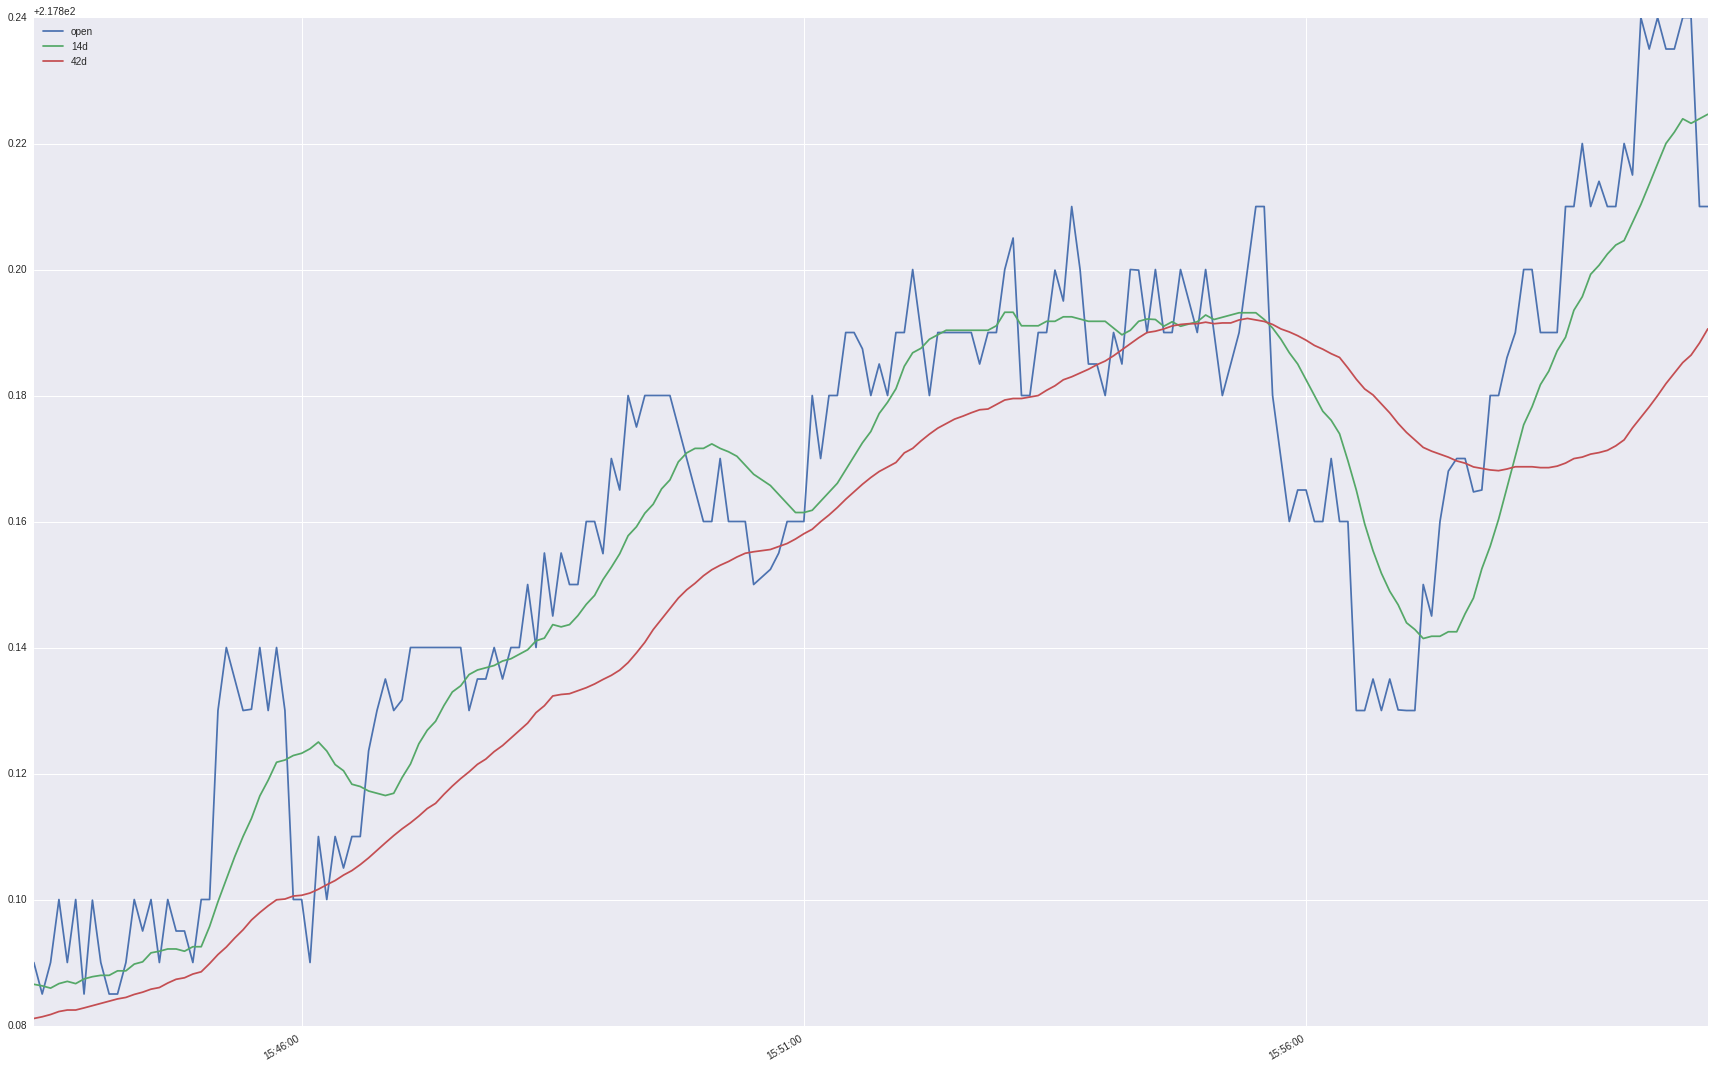

In [72]:
SPY[['open', '14d', '42d']].tail(200).plot(figsize=(30,20), grid=True);

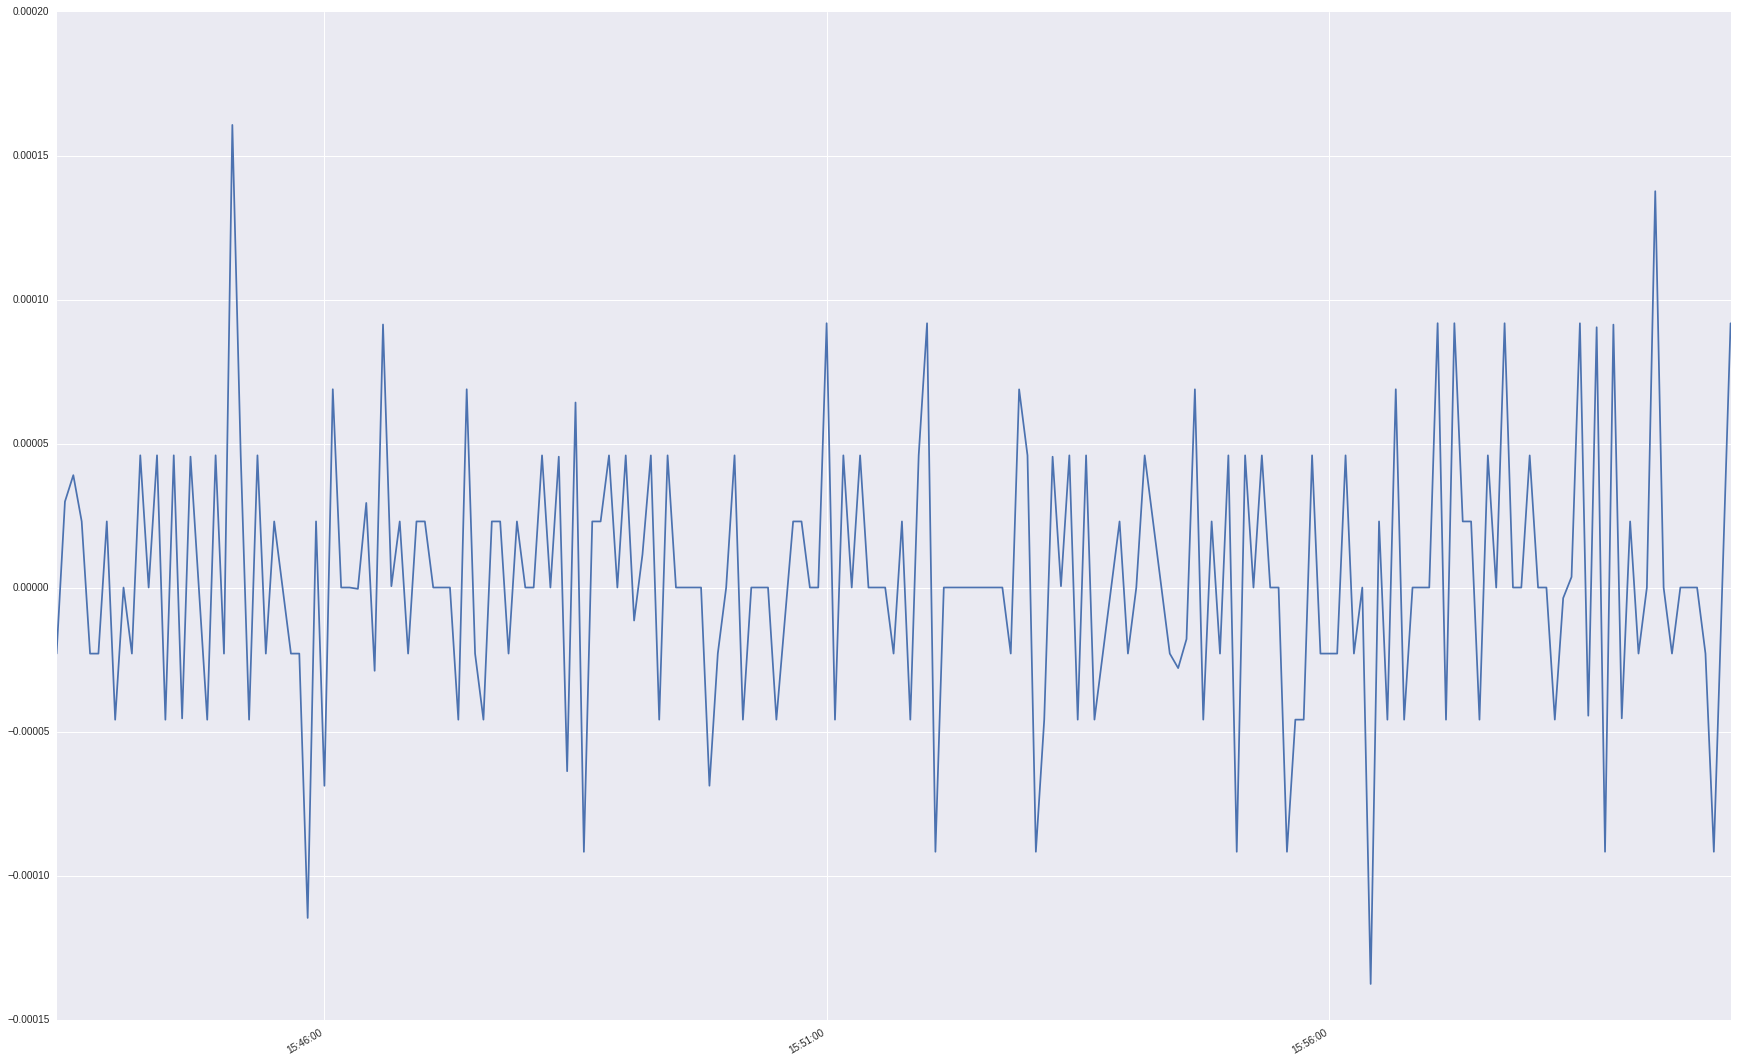

In [74]:
SPY['Return'].tail(200).plot(figsize=(30,20), grid=True); 

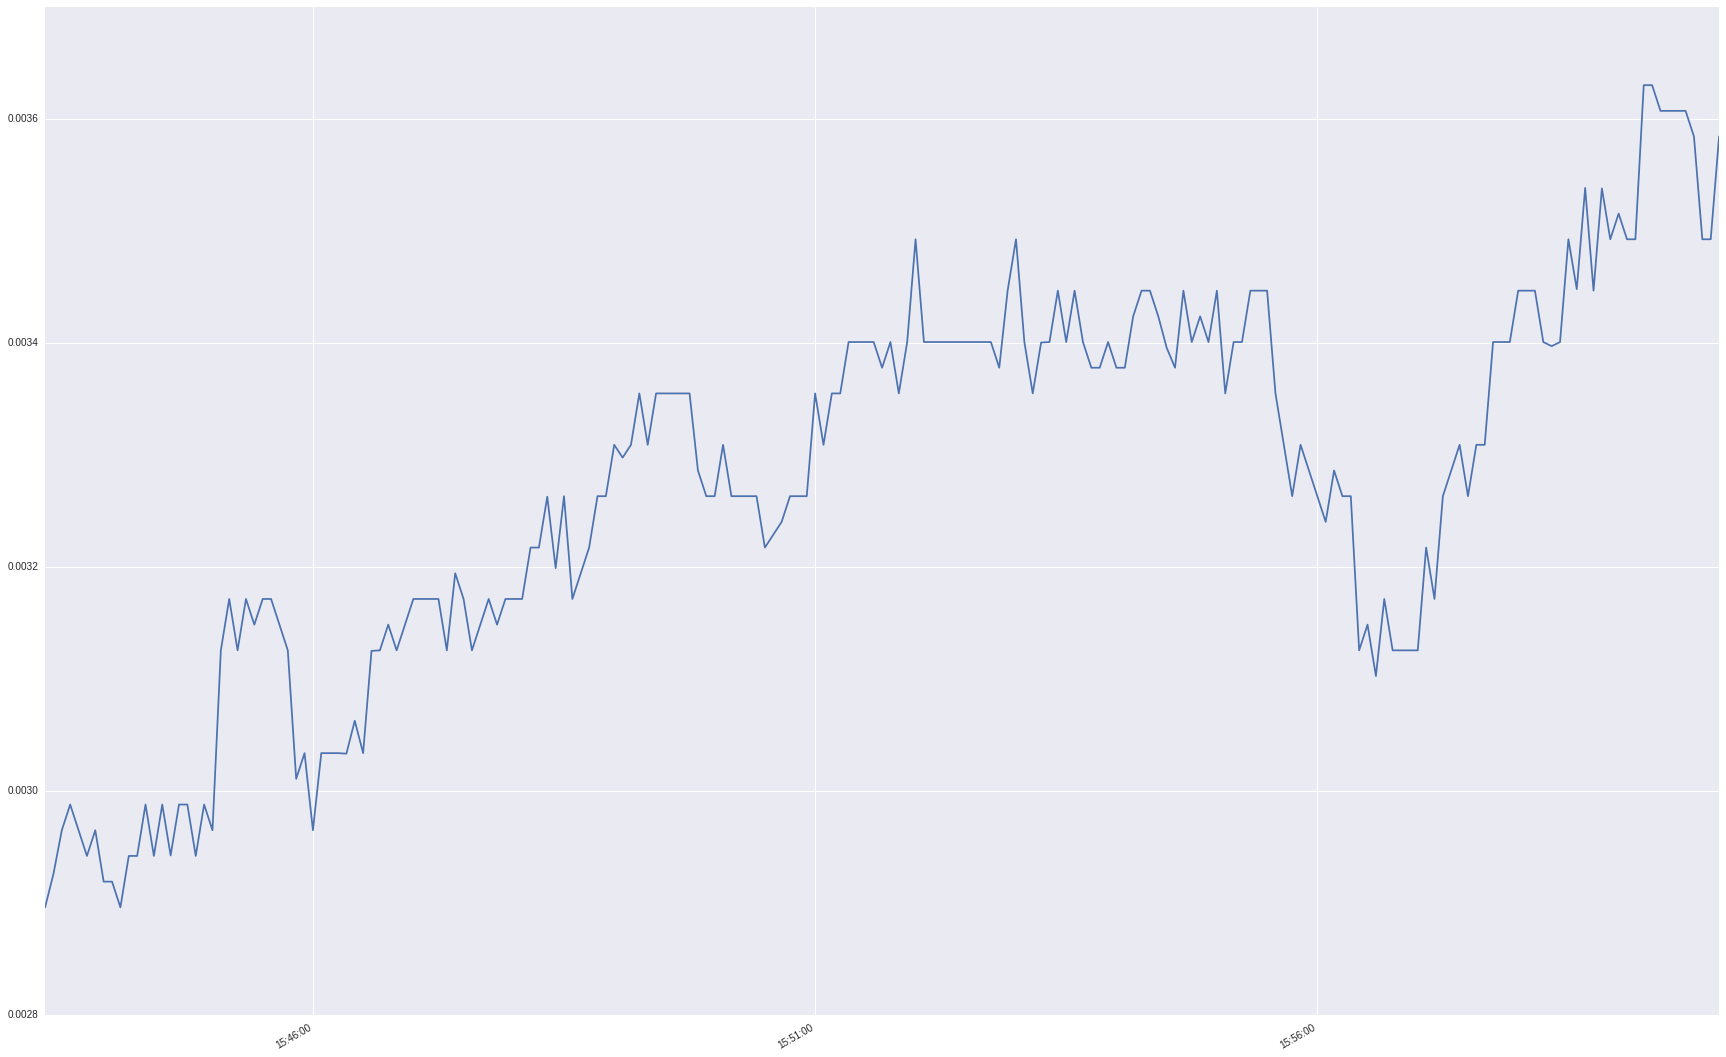

In [75]:
np.cumsum(SPY['Return']).tail(200).plot(figsize=(30,20), grid=True); 

In [133]:
#momentum signal
SPY['J_SPY']  = np.where(np.logical_and(SPY['Return']>0.0,SPY['volume']/SPY['volume'].shift(1)>1.1),SPY['Return'],np.where(np.logical_and(SPY['Return']<-0.0,SPY['volume']/SPY['volume'].shift(1)>1.1),SPY['Return'],0))

In [134]:
grouped = SPY.groupby('J_SPY')

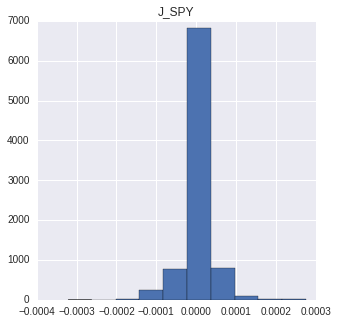

In [135]:
#grouped.size()
pd.DataFrame.hist(SPY[['J_SPY']],bins=10,figsize = [5,5]);

In [209]:
#reversion signal
SPY['J_SPY_R']  = np.where(np.logical_and(SPY['Return']>0.00003,SPY['volume']/SPY['volume'].shift(1)<0.6),SPY['Return'],np.where(np.logical_and(SPY['Return']<-0.00003,SPY['volume']/SPY['volume'].shift(1)<0.6),SPY['Return'],0))

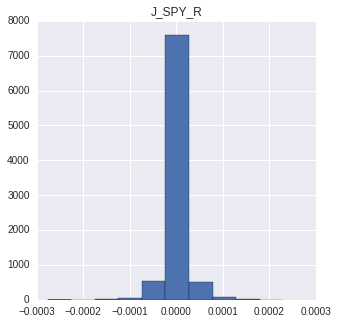

In [210]:
#grouped.size()
pd.DataFrame.hist(SPY[['J_SPY_R']],bins=10,figsize = [5,5]);

In [101]:
#SPY['J_SPY'].tail(200).plot(figsize=(30,20), grid=True); 

In [100]:
#np.cumsum(SPY['Return']).tail(200).plot(figsize=(30,20), grid=True); 

In [99]:
#(SPY['close']/SPY['close'].ix[0]).tail(200).plot(figsize=(30,20), grid=True); 

Two volumem filtered time series of SPY 'J_SPY' and 'J_SPY_R'

In [97]:
import TA# self made python file at PyCON16 folder for TA
#https://mrjbq7.github.io/ta-lib/func.html
import talib

MOMENTUM: J_SPY at low/medium level of the ROC curve==upward indicator

In [174]:
SPY['ROC'] = talib.ROC(np.asarray(SPY['close']), timeperiod=19)## good distribution of return -1 to +1 
SPY['ROC'] = np.where(SPY['ROC']>0.015,SPY['ROC'],np.where(SPY['ROC']<-0.015,SPY['ROC'],0))
#SPY['ROC'] = np.where(np.logical_and(talib.ROC(np.asarray(SPY['close']), timeperiod=19)<-0.1,SPY['J_SPY']>0),1,np.where(np.logical_and(talib.ROC(np.asarray(SPY['close']), timeperiod=19)>0.1,SPY['J_SPY']<0),-1,0))

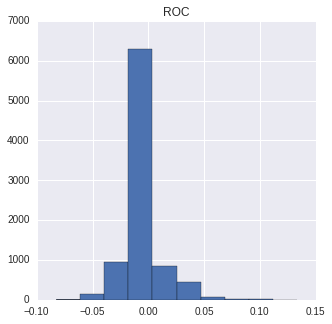

In [175]:
pd.DataFrame.hist(SPY[['ROC']],bins=10,figsize = [5,5]);

In [184]:
SPY['SIG_M'] = np.where(np.logical_and(SPY['ROC']<0.001,SPY['J_SPY']>0),1,np.where(np.logical_and(SPY['ROC']>-0.001,SPY['J_SPY']<0),-1,0))

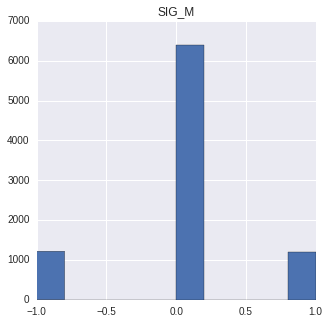

In [217]:
pd.DataFrame.hist(SPY[['SIG_M']],bins=10,figsize = [5,5]);# 1 signals further movement at same direction

In [140]:
#SPY[['J_SPY','ROC']].tail(200).plot(figsize=(30,20), grid=True); 

MOMENTUM: J_SPY_R at high/low level of the ROC curve==reversion indicator

In [214]:
SPY['SIG_R1']=np.where(np.logical_and(SPY['ROC']<-0.01,SPY['J_SPY_R']<0),1,np.where(np.logical_and(SPY['ROC']>0.005,SPY['J_SPY_R']>0),-1,0))

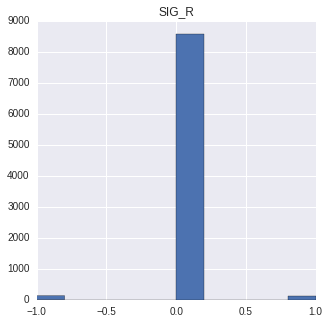

In [216]:
pd.DataFrame.hist(SPY[['SIG_R1']],bins=10,figsize = [5,5]);# 1 signals buy expecting reversion

In [225]:
#SPY[['Return','SIG_R']].tail(200).plot(figsize=(30,20), grid=True); 

In [228]:
SPY['RSI'] = np.where(talib.RSI(np.asarray(SPY['close']), timeperiod=15)>60,-1,np.where(talib.RSI(np.asarray(SPY['close']), timeperiod=15)<40,1,0))

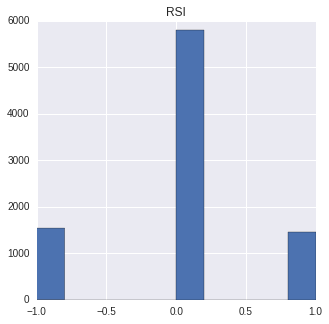

In [229]:
pd.DataFrame.hist(SPY[['RSI']],bins=10,figsize = [5,5]);

In [230]:
SPY['SIG_R2']=np.where(np.logical_and(SPY['RSI']==1,SPY['J_SPY_R']<0),1,np.where(np.logical_and(SPY['RSI']==-1,SPY['J_SPY_R']>0),-1,0))

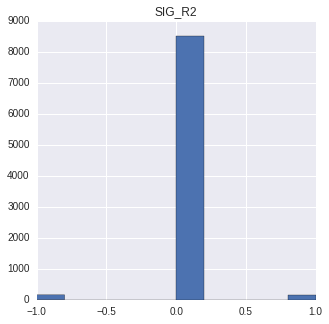

In [231]:
pd.DataFrame.hist(SPY[['SIG_R2']],bins=10,figsize = [5,5]);# 1 signals buy expecting reversion